# Least-Squares Regresion

Data used in the problem is as follows:

|x|y|
|-|--|
|1|1|
|2|1.5|
|3|2|
|4|3|
|5|4|
|6|5|
|7|8|
|8|10|
|9|13|

First, we will compute mean, variance, standard deviation, coefficient of variation for $y$.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 1.5, 2, 3, 4, 5, 8, 10, 13])

mean = np.mean(y)
var = np.var(y)
std_dev = np.std(y)
coef_var = std_dev * 100 / mean 

print("Mean: {}".format(mean))
print("Variance: {}".format(var))
print("Standard deviation: {}".format(std_dev))
print("Coefficient of variation: {} %".format(coef_var))

Mean: 5.277777777777778
Variance: 15.50617283950617
Standard deviation: 3.9377878103709665
Coefficient of variation: 74.61071640702883 %


Now, we will use the function defined in the previous block and fit a line and a second order polynomial to data.

In [8]:
def fit_line(x,y):
    """
        Function which fits straight line to the data (x,y).
        Input: 
        data x and y
        Output:
        Intercept (a0)
        Slope (a1)
        Standard error of fit (s_(y/x))
        R_square (r^2)
    """
    
    num_pts = len(x) # Number of points
    
    # Computing intercept and slope
    numerator = num_pts*np.sum(x*y) - np.sum(x)*np.sum(y)
    denominator = num_pts*np.sum(x**2) - np.sum(x)**2
    a1 = numerator/denominator
    a0 = np.mean(y) - a1*np.mean(x)
    
    # Computing standard error in the fit
    sum_error = 0
    for index in range(num_pts):
        sum_error = sum_error + (y[index] - a0 - a1*x[index])**2
    std_error = np.sqrt(sum_error/(num_pts-2))
    
    # Computing r
    numerator = num_pts*np.sum(x*y) - np.sum(x)*np.sum(y)
    denominator = np.sqrt(num_pts*np.sum(x**2) - np.sum(x)**2) * np.sqrt(num_pts*np.sum(y**2) - np.sum(y)**2)
    r = numerator/denominator
        
    return a0, a1, std_error, r**2

def fit_polynomial(x,y):
    """
        Function for fitting a polynomial to data
    """
    
    num_pts = len(x) # Number of points
    
    # Quantities need for calculation
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sum_x = np.sum(x)
    sum_x_square = np.sum(x**2)
    sum_x_cube = np.sum(x**3)
    sum_x_quartic = np.sum(x**4)
    
    # A matrix
    A = np.array([[num_pts, sum_x, sum_x_square],
                  [sum_x, sum_x_square, sum_x_cube],
                  [sum_x_square, sum_x_cube, sum_x_quartic]])
    
    # B matrix
    b = np.array([np.sum(y), np.sum(x*y), np.sum(x**2 * y)])
    
    # Solve the system of equation
    solution = np.linalg.solve(A, b)
    
    # Computing standard error in the fit
    sum_error = 0
    for index in range(num_pts):
        sum_error = sum_error + (y[index] - solution[0] - solution[1]*x[index] - solution[2]*x[index]**2)**2
    std_error = np.sqrt(sum_error/(num_pts-3))
    
    # Computing r_square
    r_square = 1 - sum_error/np.sum((y - np.mean(y))**2)
    
    return solution, std_error, r_square

Fitting straight line to data:
Slope: -2.0138888888888884
Intercept: 1.4583333333333333
Standard error: 1.3066526967183247
R square: 0.9143610668789809

Fitting second order polynomial to data:
a0: 1.4880952380952055
a1: -0.45183982683981044
a2: 0.19101731601731445
Standard error: 0.344771292115866
R square: 0.9948894656299115



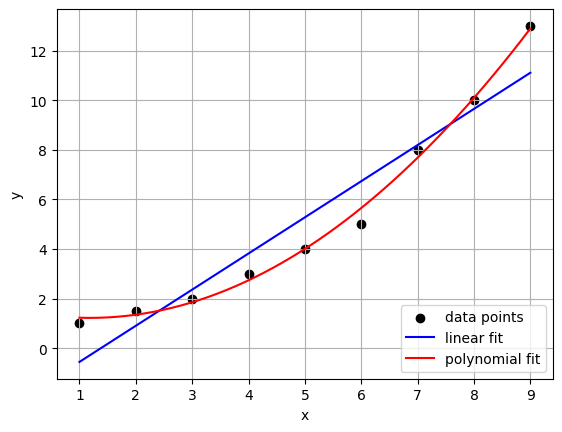

In [9]:
# Fit the line
a0, a1, std_error, r_square = fit_line(x,y)

# Printing the result
print("Fitting straight line to data:")
print("Slope: {}".format(a0))
print("Intercept: {}".format(a1))
print("Standard error: {}".format(std_error))
print("R square: {}\n".format(r_square))

# Plotting the linear fit
fig, ax = plt.subplots()
ax.scatter(x,y,c="k",label="data points")
ax.plot(np.linspace(1,9,50), a0 + a1*np.linspace(1,9,50), "b", label="linear fit")

# Fit the second-order polynomial
solution, std_error, r_square = fit_polynomial(x,y)
a0 = solution[0]
a1 = solution[1]
a2 = solution[2]

# Printing the result
print("Fitting second order polynomial to data:")
print("a0: {}".format(a0))
print("a1: {}".format(a1))
print("a2: {}".format(a2))
print("Standard error: {}".format(std_error))
print("R square: {}\n".format(r_square))

# Plotting the polynomial fit
ax.plot(np.linspace(1,9,50), a0 + a1*np.linspace(1,9,50) + a2*np.linspace(1,9,50)**2, "r", label="polynomial fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="lower right")
ax.grid()